# Assignment #5

This assignment can be completed by adding code to this notebook for each question.

Turn in a completed notebook, renamed as

`assignment5_<username>.ipynb`

with your `<username>` being your DataVU login name (e.g., mine is `kgoebber`) to `/archive/courses/met330/assignment5` via the Linux computing system.

**DUE DATE: 5 November 2021 at 4 pm.**

Prior to turning in your notebook, please cleanup and comment your code for each problem. Be sure that your output is self-describing

In [1]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

## Question #1
Studying the terrain of a region is important to understanding the flow of water and topographic influences to rising and sinking motion within the atmopshere. In this problem you'll be investigating the terrain for the state of Colorado.

1. Use the ETOPO1_gdal.nc file, which is a netCDF version of a Digital Elevation Model with terrain in units of meters.
2. Subset your domain to be over the Western U.S. (approximately from the Pacific Ocean to the Missippii River between the Canadian and Mexican border).
3. Plot the terrain in units of feet as contours or color-filled contours on a map, which includes at least the state borders with the extent focused on just the state of Colorado
4. Add the following cities to your figure as a star marker and add the city name as text near the marker
   - Denver, CO
   - Ft. Collins, CO
   - Grand Lake, CO
   - Aspen, CO
   - Steamboat Springs, CO
   - Grand Junction, CO
   - Pueblo, CO
   - Limon, CO
   - Colorado Springs, CO
5. Determine the highest and lowest elevations within the following bounding box (-102 to -109 E; 37 to 41 N; roughly the state of Colorado) and plot a marker at the highest and lowest elevation latitude/longitude points and plot the text giving the elevation values for each point.
6. Appropriately title and label your plot. The figure asthetics (e.g., use of color, linesize, linetype, linewidths, colormaps, etc.) will factor into the grading of the final figure.

Input:
   - Global Digital Elevation Model data; ETOPO1_gdal.nc (located in /archive/courses/met290)

Output:
   - Figure 1: Terrain Contour plot in units of feet with the nine city locations identified and labeled, along with the highest and lowest points.
   
Note: The original data file contains the terrain in units of meters above sea level.

In [2]:
ds = xr.open_dataset('../notebooks/ETOPO1_gdal.nc')

In [3]:
western_US = ds.topography.sel(lat=slice(55, 20), lon=slice(-125, -90))

In [4]:
locations = {'Denver': (39.7392, -104.9903), 'Ft. Collins': (40.5853, -105.0844), 'Grand Lake': (40.2522, -105.8231),
             'Aspen': (39.1911, -106.8175), 'Steamboat Springs': (40.4850, -106.8317), 'Grand Junction': (39.0639, -108.5506),
             'Pueblo': (38.2544, -104.6091), 'Limon': (39.2639, -103.6922), 'Colorado Springs': (38.8339, -104.8214)}

In [5]:
colorado = western_US.sel(lat=slice(41, 37), lon=slice(-109, -102))
co_max = colorado.where(colorado == colorado.max(), drop=True)[0][0]
co_min = colorado.where(colorado == colorado.min(), drop=True)[0][0]

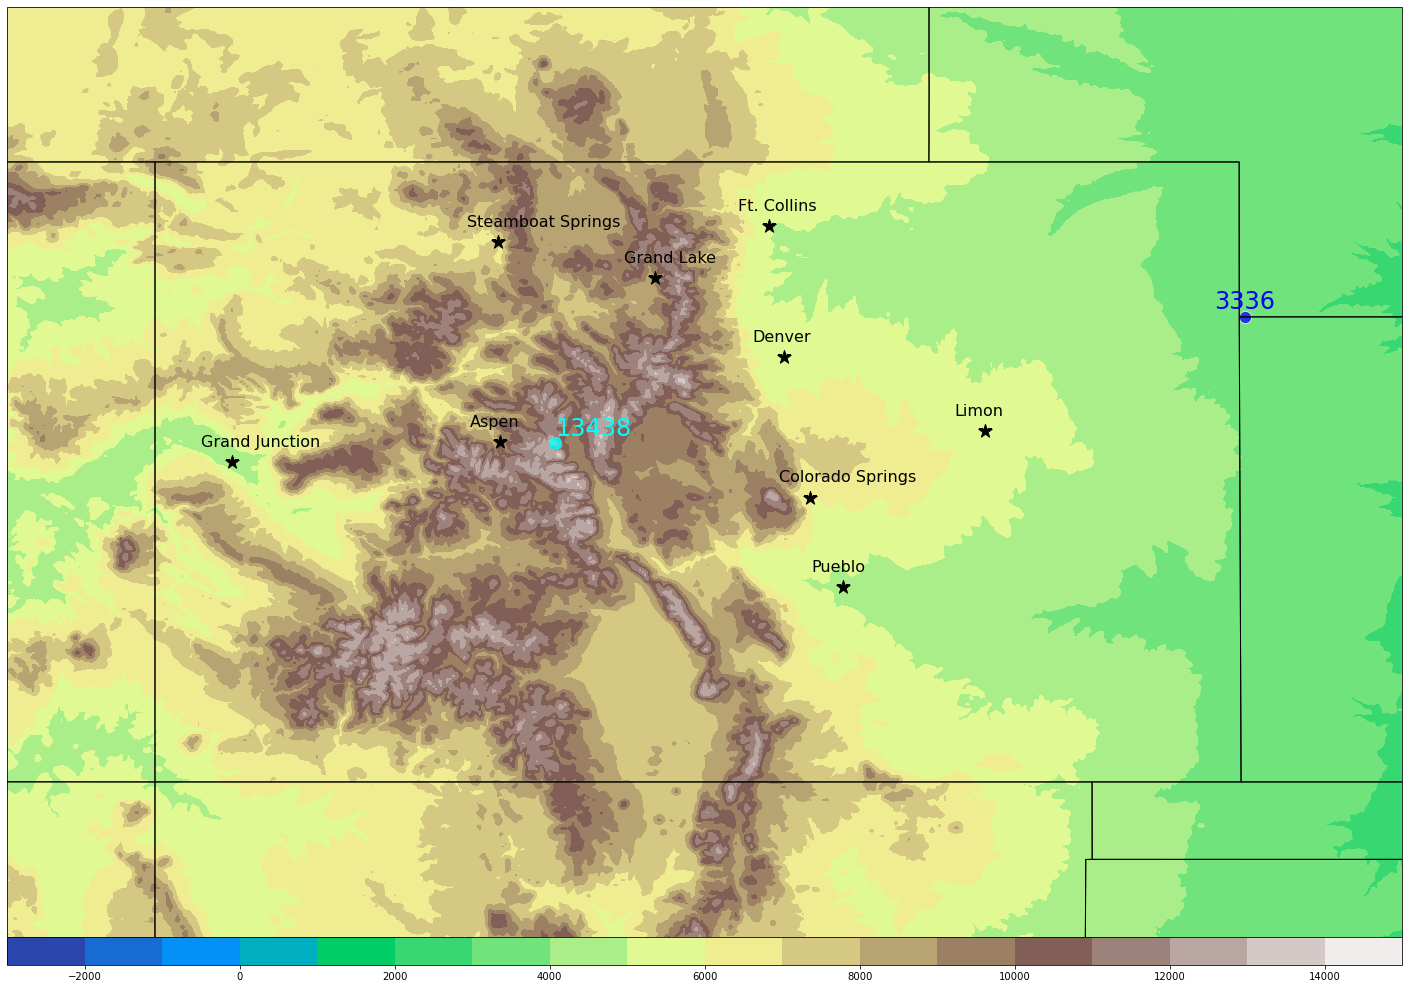

In [6]:
plt.figure(1, figsize=(25, 25))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([-110, -101, 36, 42], ccrs.PlateCarree())

cf = ax.contourf(western_US.lon, western_US.lat, western_US*3.28084, np.arange(-3000, 15001, 1000), #colors='black',
                 cmap=plt.cm.terrain, transform=ccrs.PlateCarree())
plt.colorbar(cf, orientation='horizontal', pad=0, aspect=50)

for name in locations.keys():
    ax.scatter(locations[name][1], locations[name][0], s=200, marker='*', color='black')
    ax.text(locations[name][1]-.2, locations[name][0]+.1, name, color='black', fontsize=16)
    
ax.scatter(co_max.lon, co_max.lat, s=150, color='cyan', alpha=0.75)
ax.text(co_max.lon, co_max.lat+.05, np.int64(co_max.values*3.28084), fontsize=24, color='cyan')

ax.scatter(co_min.lon, co_min.lat, s=150, color='blue', edgecolor='white', alpha=0.75)
ax.text(co_min.lon, co_min.lat+.05, np.int64(co_min.values*3.28084), fontsize=24, color='blue',
        ha='center')

ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='black')

plt.show()

## Question #2
Sea surface temperatures (SSTs) are an important feature that explains much about the distribution of temperature, precipitation, and thus vegetation around the globe. Owing to parts of the global circulation, a prominent variation in SSTs occurs in the Eastern Pacific Ocean (off the coast of Peru) that are related to changes in the Southern Oscillation Index and the phenomenon we call El Nino and La Nina. El Nino patterns are associated with warmer than normal (a warm anomaly) within the central or eastern Pacific Ocean along the equator. Your task is in evaluating the development of the warm SST anomalies associated with a significant El Nino event in 1997 by creating some graphics detailed below.

1. Read in OISST daily mean data for 1997 (version 2) and the OISST daily long term mean (LTM) netCDF files.
2. Plot the global SST daily mean values for the first day of Fall in 1997.
3. Compute the anomaly values and plot the anomalies for the Eastern Pacific Ocean (25N to 25S; 130E to 70W) for
   - 1 February 1997
   - 1 April 1997
   - 1 June 1997
   - 1 August 1997
   - 1 October 1997
   - 1 December 1997
   
   Plot each day in a separate axes on one figure (e.g., you should have six subplots) to demonstrate the evolution of the SST anomalies over the course of the year.
4. Choose an appropriate colormap for viewing anomaly values (a diverging colormap would be most appropriate)
5. Determine the maximum anomaly for each month identified above and report the maximum value for each subplot in its title.

Input Data:
  - OISST (Optimum Interpolation SST v2; https://psl.noaa.gov/thredds/catalog/Datasets/noaa.oisst.v2.highres/catalog.html
     - Daily Means for 1997: https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1997.v2.nc
     - Daily LTM 1971-1990: https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.ltm.nc
     
Output:
  - Figure 1: Global SST for the first day of fall 1997
  - Figure 2: A multipanel plot containing the six monthly SST anomalies

In [7]:
ds_oisst = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.1997.v2.nc')
ds_oisst_ltm = xr.open_dataset('https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.ltm.nc')

/Users/kgoebber/miniconda3/envs/main/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/kgoebber/miniconda3/envs/main/lib/python3.8/site-packages/xarray/core/indexing.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


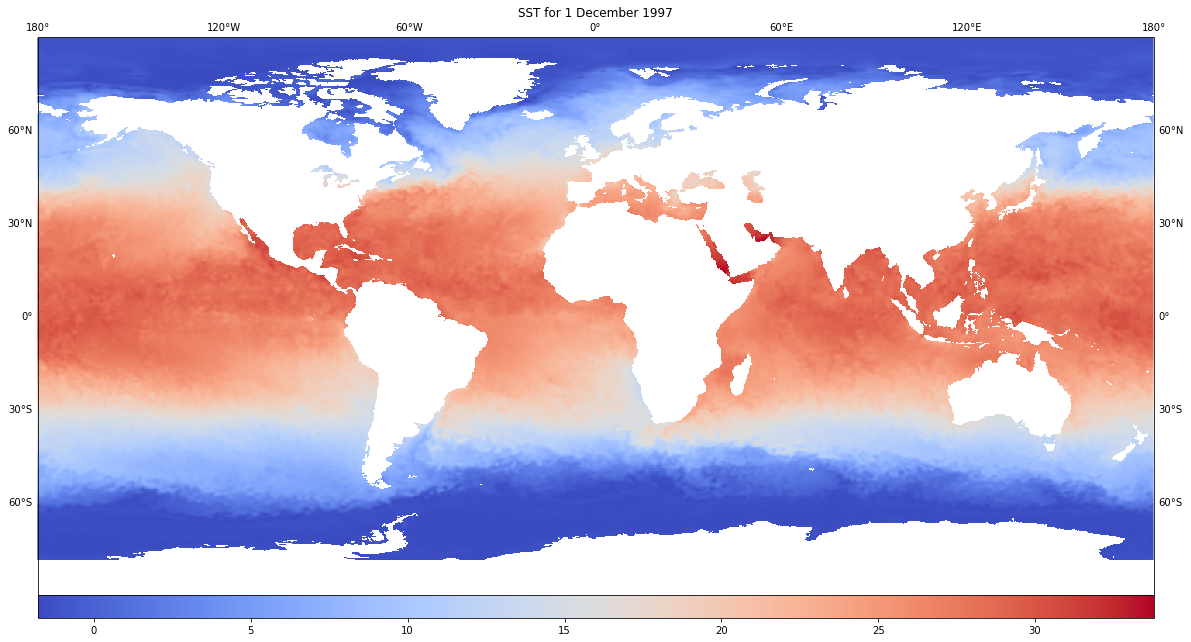

In [8]:
plt.figure(2, figsize=(20, 15))
ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = ax.pcolormesh(ds_oisst.lon, ds_oisst.lat, ds_oisst.sst.sel(time=datetime(1997, 9, 22)),
                   cmap=plt.cm.coolwarm, shading='auto')

plt.colorbar(cf, orientation='horizontal', pad=0, aspect=50)

gl = ax.gridlines(alpha=0, draw_labels=True)
gl.bottom_labels = False

#ax.add_feature(cfeature.COASTLINE.with_scale('10m'))

ax.set_title('SST for 1 December 1997')

plt.show()

In [9]:
equatorial_Pacific = ds_oisst.sst.sel(lat=slice(-25, 25), lon=slice(130, 360-70))
equatorial_Pacific_ltm = ds_oisst_ltm.sst.sel(lat=slice(-25, 25), lon=slice(130, 360-70))

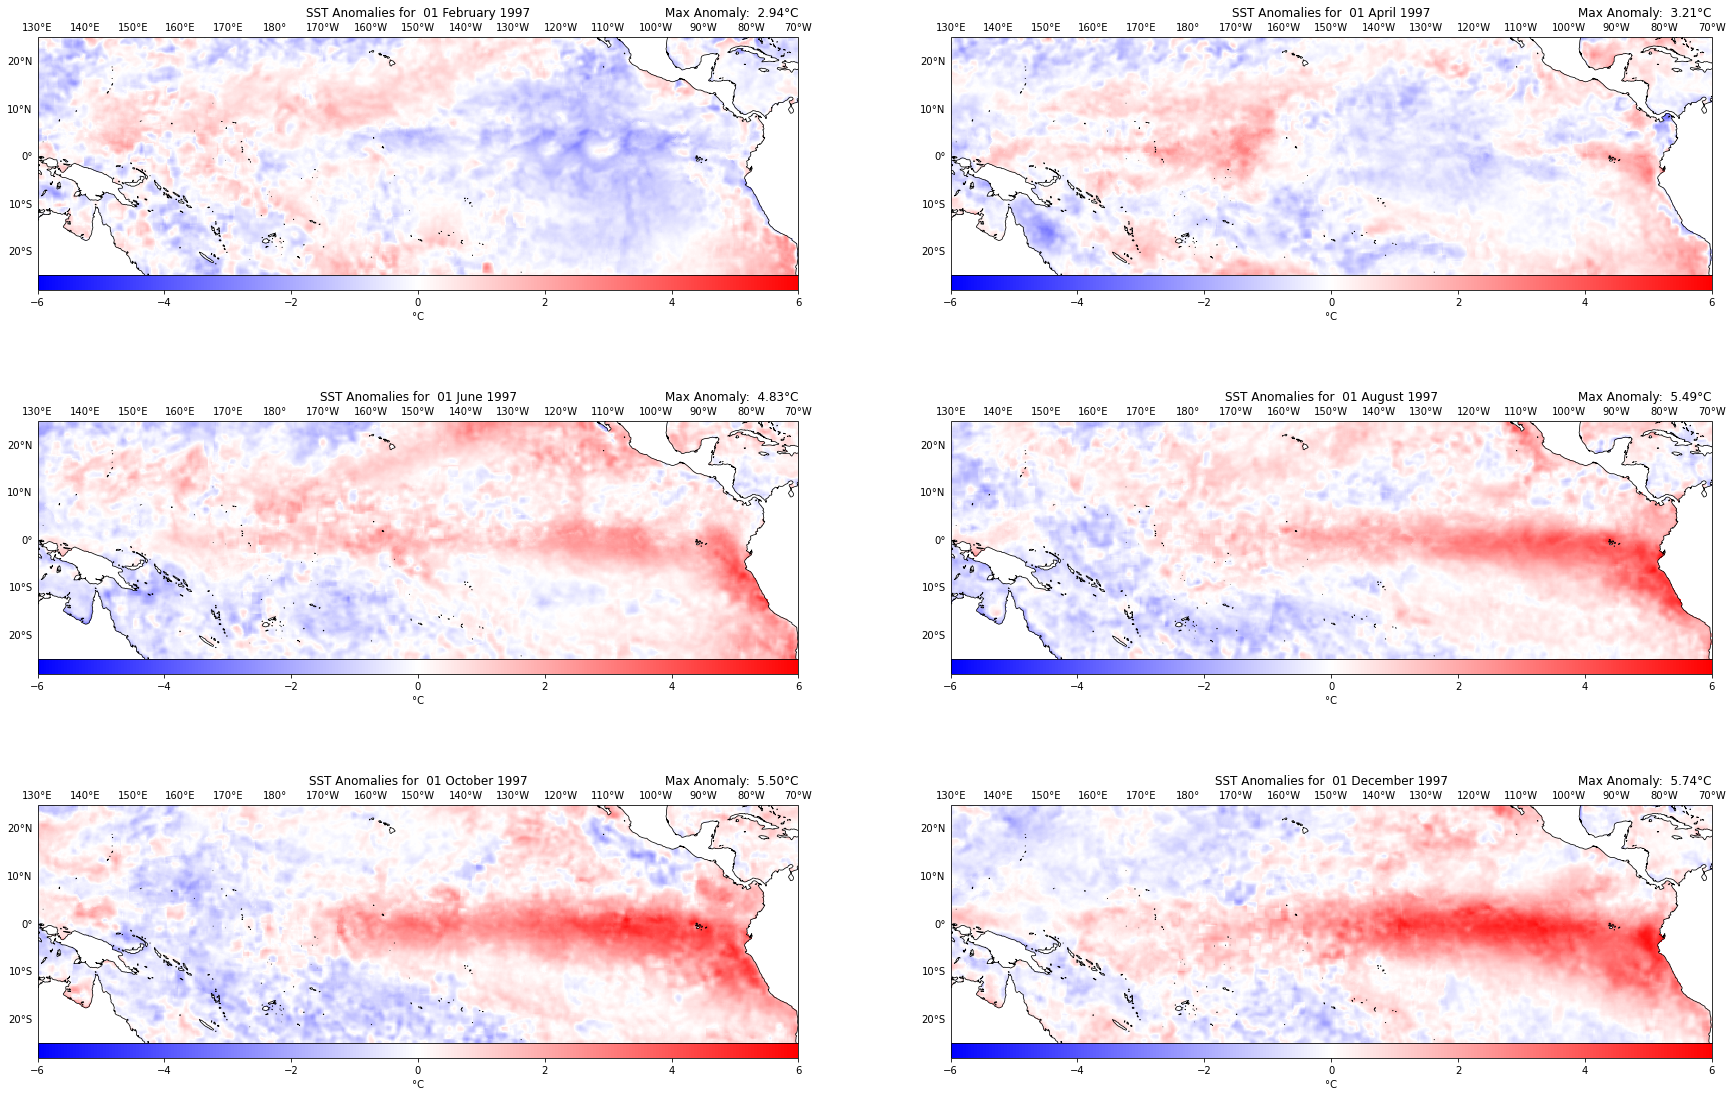

In [10]:
plt.figure(3, figsize=(30, 20))

for index, month, year in [(1, 2, 1997), (2, 4, 1997), (3, 6, 1997), (4, 8, 1997), (5, 10, 1997), (6, 12, 1997)]:
    anom = equatorial_Pacific.sel(time=datetime(year, month, 1)) - equatorial_Pacific_ltm.sel(time=cftime.DatetimeGregorian(1, month, 1))
    
    ax = plt.subplot(3, 2, index, projection=ccrs.PlateCarree(central_longitude=180))
    
    cf = ax.pcolormesh(anom.lon, anom.lat, anom, vmin=-6, vmax=6, cmap=plt.cm.bwr, shading='auto', transform=ccrs.PlateCarree())
    cb = plt.colorbar(cf, orientation='horizontal', pad=0, aspect=50)
    cb.set_label('\u00b0C')
    
    ax.set_title(f'SST Anomalies for {datetime(year, month, 1): %d %B %Y}')
    ax.set_title(f'Max Anomaly: {np.nanmax(anom): .2f}\u00b0C', loc='right')
    ax.coastlines(linewidth=0.75, color='black')
    
    gl = ax.gridlines(xlocs=[130, 140, 150, 160, 170, 180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80, -70],
                      alpha=0, draw_labels=True)
    gl.bottom_labels = False
    
plt.show()

In [12]:
print(ds_oisst)

<xarray.Dataset>
Dimensions:  (time: 365, lon: 1440, lat: 720)
Coordinates:
  * time     (time) datetime64[ns] 1997-01-01 1997-01-02 ... 1997-12-31
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.5
    title:                           NOAA High-resolution Blended Analysis: D...
    institution:                     NOAA/NCDC
    source:                          NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/p...
    comment:                         Reynolds, et al., 2007: Daily High-Resol...
    history:                         Thu Aug 24 13:43:21 2017: ncatted -O -a ...
    dataset_title:                   NOAA Daily Optimum Interpolation Sea Sur...
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    DODS_EXTRA.Unlimited_Dimension:  time
